In [70]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
#from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os
import cv2

from PIL import Image 

%matplotlib inline

In [71]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename,"r") 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


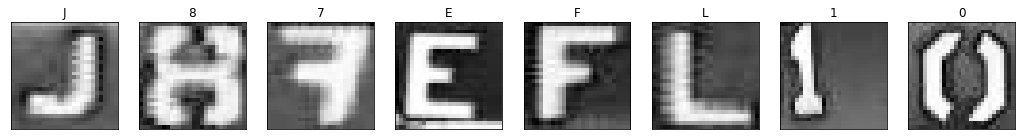

In [72]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[train_labels[image_num]][0])

In [73]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# How many categories do we have in the dataset
n_categories = len(class_names)

# What are the dimensions of each image
x_size = train_images.shape[1]
y_size = train_images.shape[2]

In [30]:
x_size

28

In [30]:
# Design the MLP architecture. 1st design
#model_1 = keras.Sequential([
    #keras.layers.Flatten(input_shape=(x_size, y_size)),
    #keras.layers.Dense(256, activation=tf.nn.relu),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(80, activation=tf.nn.relu),
    #keras.layers.Dense(n_categories, activation=tf.nn.softmax)
#])

# Compile the model
#model_1.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

In [6]:
# Design the MLP architecture. 2nd design. Less layers.  
#model_1 = keras.Sequential([
    #keras.layers.Flatten(input_shape=(x_size, y_size)),
    #keras.layers.Dense(128, activation=tf.nn.relu),
   # keras.layers.Dense(80, activation=tf.nn.relu),
    #keras.layers.Dense(n_categories, activation=tf.nn.softmax)
#])

# Compile the model
#model_1.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [74]:
# Design the MLP architecture. 3rd design.  Even Less layers.  
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_size, y_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(n_categories, activation=tf.nn.softmax)
])

# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
#1st training over 200 epochs
#history = model_1.fit(train_images, train_labels, epochs=200, verbose=1)



Epoch 1/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.1456 - acc: 0.96502s - loss: 0.4839 - acc: 0.8 - ETA: 2s - loss: 0.4095 - ac - ETA
Epoch 2/200
55731/55731 [==============================] - 3s 49us/sample - loss: 0.0277 - acc: 0.9927
Epoch 3/200
55731/55731 [==============================] - 3s 48us/sample - loss: 0.0206 - acc: 0.9947
Epoch 4/200
55731/55731 [==============================] - 3s 50us/sample - loss: 0.0222 - acc: 0.9941
Epoch 5/200
55731/55731 [==============================] - 3s 49us/sample - loss: 0.0138 - acc: 0.9964
Epoch 6/200
55731/55731 [==============================] - 3s 50us/sample - loss: 0.0149 - acc: 0.9957
Epoch 7/200
55731/55731 [==============================] - 3s 50us/sample - loss: 0.0136 - acc: 0.9962
Epoch 8/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0110 - acc: 0.9971
Epoch 9/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0134 - acc: 0.9963
Epoch 10/

55731/55731 [==============================] - 4s 67us/sample - loss: 0.0025 - acc: 0.9992
Epoch 158/200
55731/55731 [==============================] - 3s 56us/sample - loss: 0.0021 - acc: 0.9994
Epoch 159/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0118 - acc: 0.9986
Epoch 160/200
55731/55731 [==============================] - 3s 57us/sample - loss: 0.0020 - acc: 0.9994
Epoch 161/200
55731/55731 [==============================] - 3s 57us/sample - loss: 0.0031 - acc: 0.9992
Epoch 162/200
55731/55731 [==============================] - 3s 57us/sample - loss: 0.0098 - acc: 0.9987
Epoch 163/200
55731/55731 [==============================] - 3s 57us/sample - loss: 0.0034 - acc: 0.9994
Epoch 164/200
55731/55731 [==============================] - 3s 57us/sample - loss: 0.0046 - acc: 0.9991
Epoch 165/200
55731/55731 [==============================] - 3s 56us/sample - loss: 0.0075 - acc: 0.9989
Epoch 166/200
55731/55731 [==============================] - 3s 57us/

In [7]:
#2nd trainig over 100 epochs
#history = model_1.fit(train_images, train_labels, epochs=100, verbose=1)



Epoch 1/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.1567 - acc: 0.9662
Epoch 2/100
55731/55731 [==============================] - 2s 37us/sample - loss: 0.0258 - acc: 0.9936
Epoch 3/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0174 - acc: 0.9955 ETA: 0s - loss: 0.0172 - acc: 0.
Epoch 4/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0156 - acc: 0.9961
Epoch 5/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0152 - acc: 0.99610s - loss: 0.0152 - acc: 0.
Epoch 6/100
55731/55731 [==============================] - 2s 38us/sample - loss: 0.0133 - acc: 0.99650s - loss: 0.015
Epoch 7/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0104 - acc: 0.9973
Epoch 8/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0120 - acc: 0.9968
Epoch 9/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0115 - acc: 0.99

55731/55731 [==============================] - 2s 41us/sample - loss: 0.0030 - acc: 0.9992
Epoch 79/100
55731/55731 [==============================] - 2s 39us/sample - loss: 0.0059 - acc: 0.9985
Epoch 80/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0051 - acc: 0.9990
Epoch 81/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0045 - acc: 0.9989
Epoch 82/100
55731/55731 [==============================] - 2s 41us/sample - loss: 0.0037 - acc: 0.9992
Epoch 83/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0059 - acc: 0.9987
Epoch 84/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0029 - acc: 0.9994
Epoch 85/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0057 - acc: 0.9986
Epoch 86/100
55731/55731 [==============================] - 2s 40us/sample - loss: 0.0051 - acc: 0.9989
Epoch 87/100
55731/55731 [==============================] - 2s 42us/sample - 

In [75]:
#3rd trainig over 10 epochs
history = model_1.fit(train_images, train_labels, epochs=150, verbose=1)



Epoch 1/150
55731/55731 [==============================] - 2s 41us/sample - loss: 0.1653 - acc: 0.9711
Epoch 2/150
55731/55731 [==============================] - 2s 37us/sample - loss: 0.0217 - acc: 0.9951
Epoch 3/150
55731/55731 [==============================] - 3s 47us/sample - loss: 0.0153 - acc: 0.9961
Epoch 4/150
55731/55731 [==============================] - 3s 47us/sample - loss: 0.0134 - acc: 0.9965
Epoch 5/150
55731/55731 [==============================] - 3s 47us/sample - loss: 0.0123 - acc: 0.9969
Epoch 6/150
55731/55731 [==============================] - 3s 54us/sample - loss: 0.0104 - acc: 0.9973
Epoch 7/150
55731/55731 [==============================] - 3s 46us/sample - loss: 0.0115 - acc: 0.9971
Epoch 8/150
55731/55731 [==============================] - 3s 46us/sample - loss: 0.0075 - acc: 0.9981
Epoch 9/150
55731/55731 [==============================] - 3s 46us/sample - loss: 0.0098 - acc: 0.9975
Epoch 10/150
55731/55731 [==============================] - 3s 60us/sampl

55731/55731 [==============================] - 2s 44us/sample - loss: 0.0040 - acc: 0.9990
Epoch 80/150
55731/55731 [==============================] - 3s 45us/sample - loss: 0.0043 - acc: 0.9989
Epoch 81/150
55731/55731 [==============================] - 3s 45us/sample - loss: 0.0035 - acc: 0.9992
Epoch 82/150
55731/55731 [==============================] - 2s 43us/sample - loss: 0.0035 - acc: 0.9992
Epoch 83/150
55731/55731 [==============================] - 2s 44us/sample - loss: 0.0044 - acc: 0.9991
Epoch 84/150
55731/55731 [==============================] - 2s 44us/sample - loss: 0.0034 - acc: 0.9991
Epoch 85/150
55731/55731 [==============================] - 2s 44us/sample - loss: 0.0032 - acc: 0.9992
Epoch 86/150
55731/55731 [==============================] - 2s 43us/sample - loss: 0.0044 - acc: 0.9988
Epoch 87/150
55731/55731 [==============================] - 2s 43us/sample - loss: 0.0032 - acc: 0.9993
Epoch 88/150
55731/55731 [==============================] - 2s 43us/sample - 

In [76]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

23888/23888 [==============================] - 1s 29us/sample - loss: 0.0175 - acc: 0.9985A: 0s - loss: 0.0341 - a
Test accuracy: 0.9984511
Test loss: 0.017528078771697177


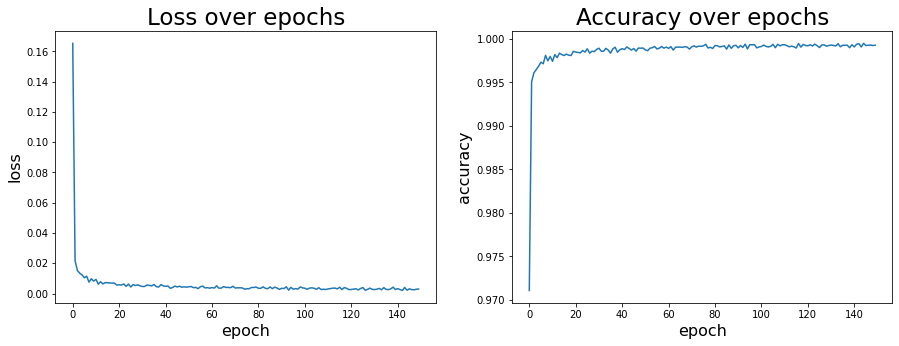

In [77]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

In [78]:
# Modified from: https://www.tensorflow.org/tutorials/keras/basic_classification

import matplotlib.pyplot as plt
import numpy as np




   
def plot_image(i, predictions_array, true_label, img, category_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(category_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         category_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label, n_categories):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(n_categories), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

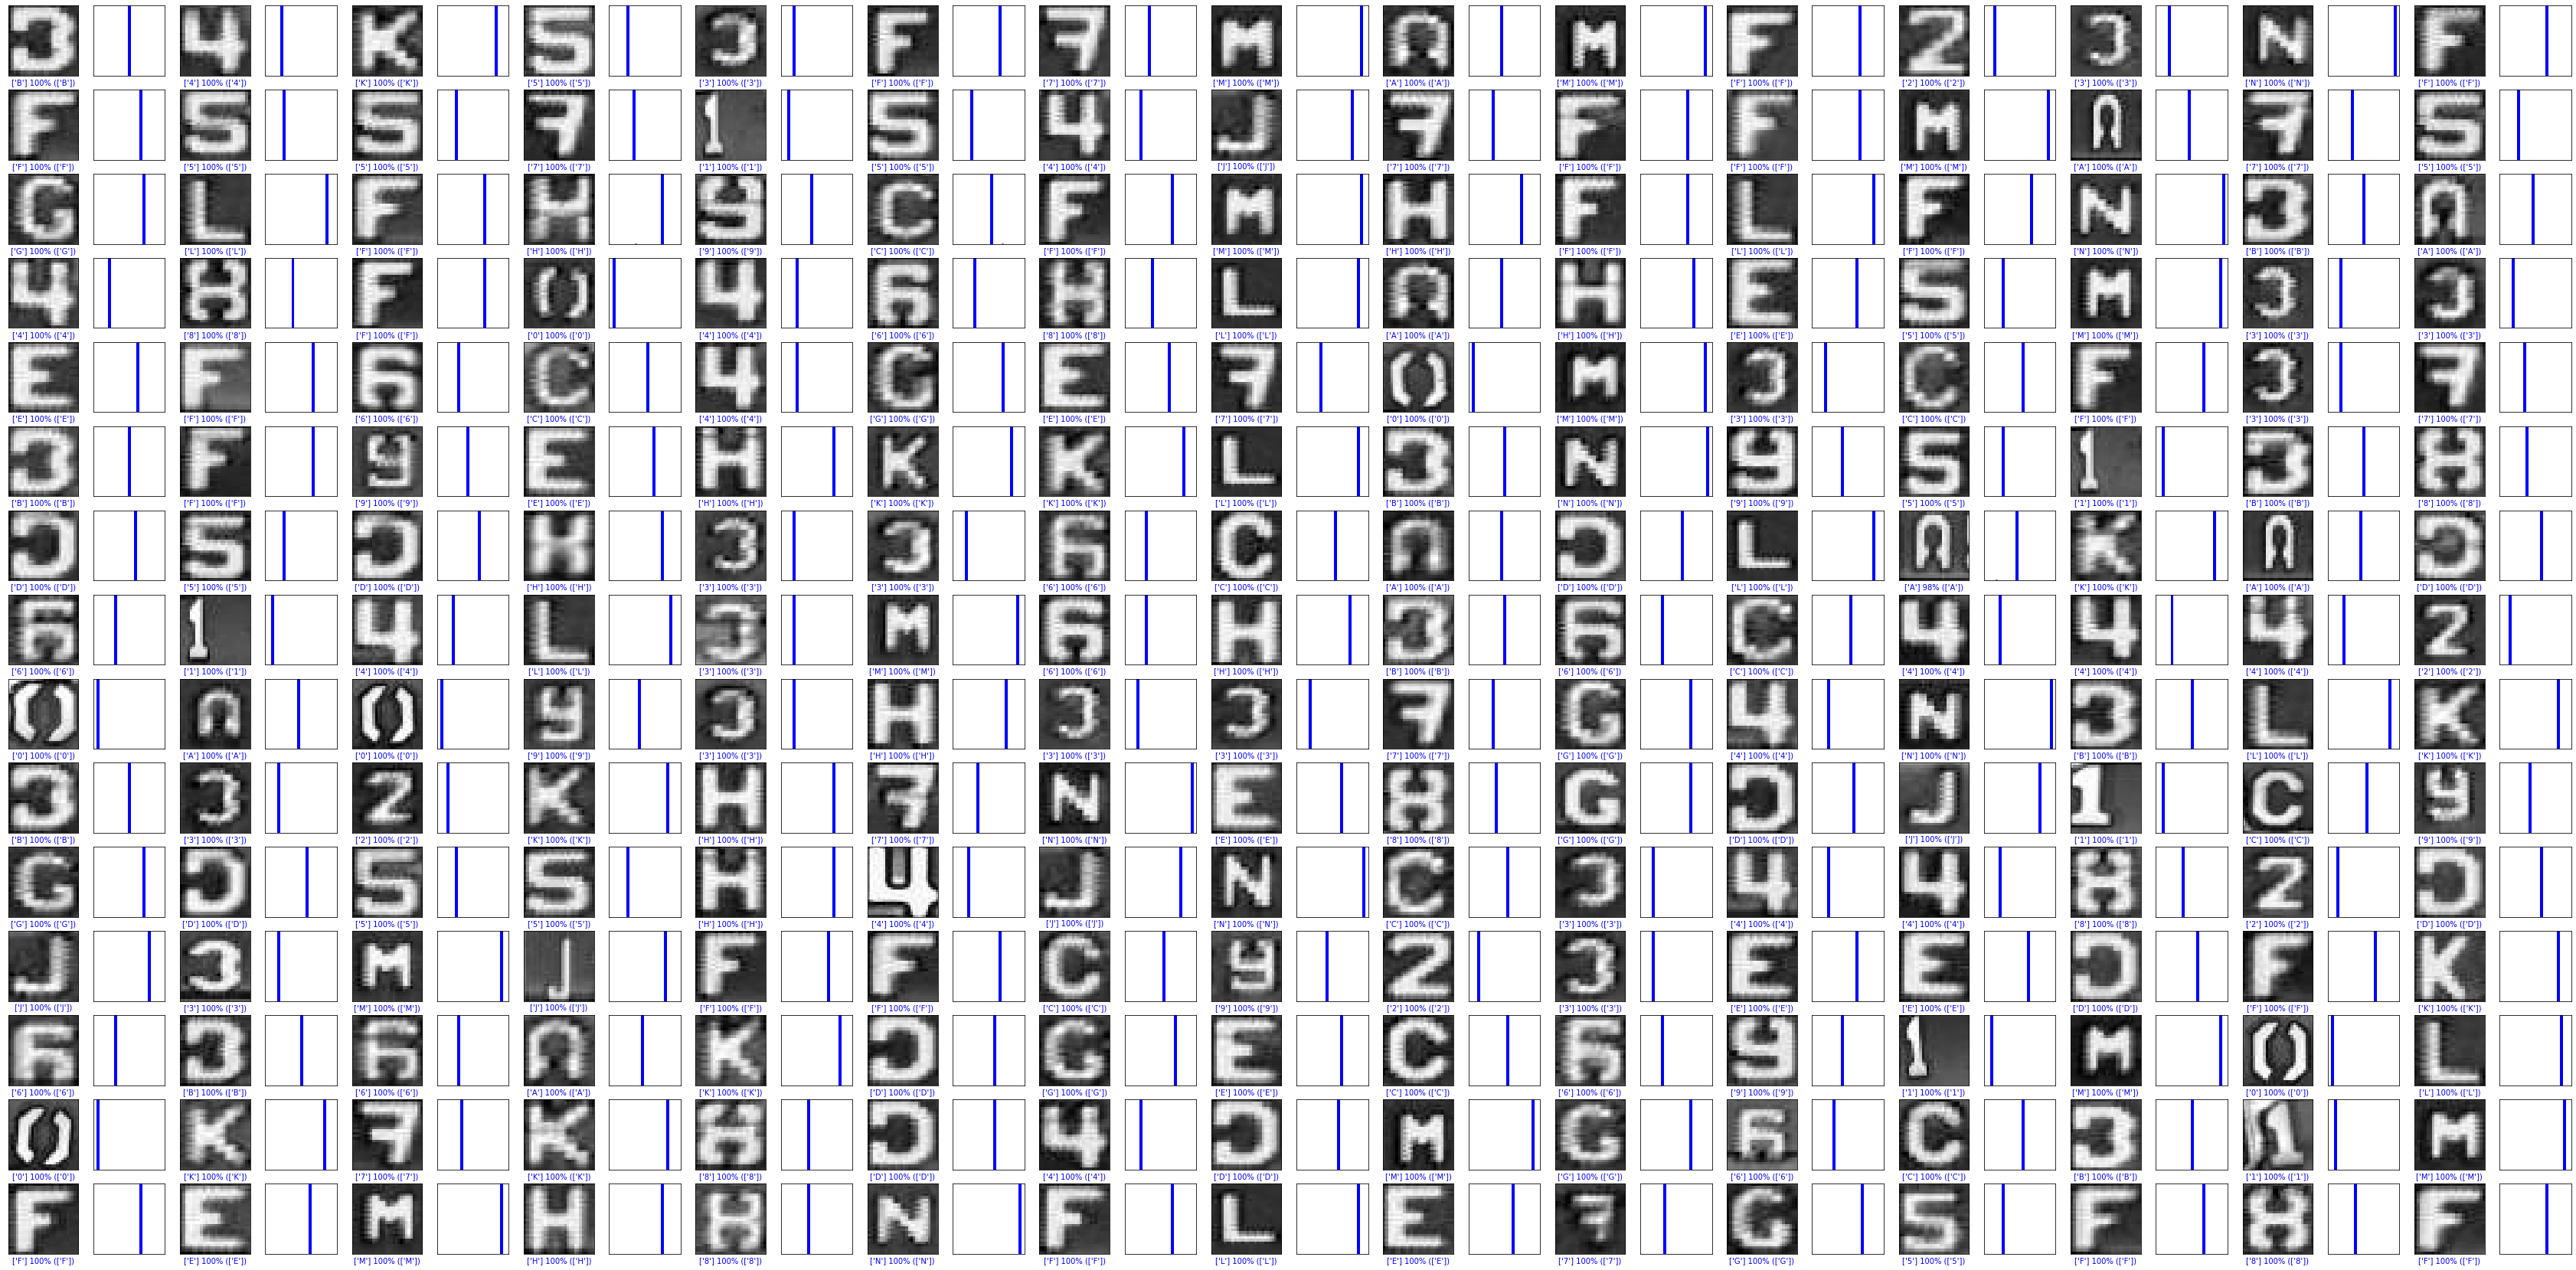

In [79]:
# Use the model to make predictions on the test images
predictions = model_1.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 15
num_cols = 15
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [80]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

23888/23888 - 1s - loss: 0.0175 - acc: 0.9985

Test accuracy: 0.9984511


In [38]:
# Grab an image from the test dataset.
#img = test_images[1]

#print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
#img = (np.expand_dims(img,0))

p#rint(img.shape)

(1, 28, 28)


In [111]:
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
                'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N']
                

In [133]:
test_8 = cv2.imread('test_8.jpg', cv2.IMREAD_GRAYSCALE)
test_8 = cv2.resize(test_8, (28,28))
test_8 = test_8/255.0

#model_1.predict(test_0)

In [134]:
result_8 = model_1.predict_classes(test_8.reshape(1, 28, 28))

In [135]:
result_8

array([12], dtype=int64)

In [158]:
np.argmax(result_4, axis =1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [154]:
print(class_names[result_8[0]])

['C']
